In [311]:
import numpy as np
import matplotlib.pyplot as plt

def mse(y1, y2):
    return np.mean((y1 - y2)**2, axis=0)

class NonLinearRegressor:
    def __init__(self, learning_rate = 0.001, n_iterations = 10000, epsilon = 0.01, loss_fn = mse):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.epsilon = epsilon
        self.loss_fn = loss_fn
        self.model_parameters = None

    def fit(self, X, y):
        delta = 0.00001
        num_parameters = X.shape[1] + 1

        if self.model_parameters:
            pass
        else:
            self.model_parameters = np.random.rand(num_parameters)

        gradients = np.zeros(num_parameters)
        eps = np.zeros_like(gradients) + self.epsilon
        X_ = np.insert(X,X.shape[1],np.ones(X.shape[0]), axis=1)
        delI = delta*np.identity(num_parameters)

        for i in range(self.n_iterations):
            params = np.zeros_like(delI) + self.model_parameters
            grads = delI + self.model_parameters
            gradients = (self.loss_fn(X_@grads.T, y) - self.loss_fn(X_@params.T, y))/delta
            self.model_parameters -= self.learning_rate*gradients
            # print(self.loss_fn(np.dot(X_,params.T), y))
            if (np.abs(gradients) < eps).all(0):
                break
            
    def predict(self, X):
        X_ = np.insert(X,X.shape[1],np.ones(X.shape[0]), axis=1)
        
        return (X_@self.model_parameters).reshape(-1,1)

    def __repr__(self):
        return f"Model Parameters: {self.model_parameters}"
    

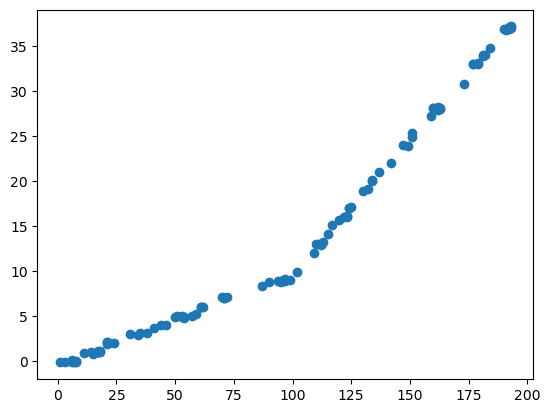

In [312]:
num_inst = 100

high = 200
mid = 100

X = np.random.randint(0, high, num_inst)
y = np.zeros_like(X)
for i in range(len(X)):
    if X[i] < mid:
        y[i] = 0.1*X[i]
    else:
        y[i] = 0.3*(X[i] - mid) + 0.1*mid

y = y + np.random.randn(num_inst)/10 - np.random.randn(num_inst)/10

plt.scatter(X,y)
X = X.reshape(-1,1)

In [313]:
# np.random.seed(10)
# weights = np.random.rand(10)
weights = np.ones(10)
gradients = np.zeros_like(weights)
weights


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [314]:
X_ = np.ones((num_inst, 7))
X_[:,0] = X.reshape(-1)
X_[:,2] = X.reshape(-1)
X_[:,4] = X.reshape(-1)
delta = 0.00001
learning_rate = 0.00001

print(f"Gradients: {gradients}\nWeights: {weights}\n")
for j in range(100):
    for i in range(len(weights)):
        weights_copy = weights.copy()
        w1 = weights[0:6]
        w1 = np.append(w1,1)
        w2 = np.identity(7)*np.array([weights[6], weights[6], weights[7], weights[7], weights[8], weights[8], weights[9]]).reshape(1,-1)
        W = w1.T@w2
        m1 = mse(X_ @ W, y)

        weights[i] = weights[i] + delta
        w1_ = weights[0:6]
        w1_ = np.append(w1_,1)
        w2_ = np.identity(7)*np.array([weights[6], weights[6], weights[7], weights[7], weights[8], weights[8], weights[9]]).reshape(1,-1)
        W_ = w1_.T@w2_
        m2 = mse(X_ @ W_, y)
        weights = weights_copy.copy()
        gradients[i] = (m2 - m1)/delta
        # print(X_ @ W_)
        # print(y)
        # print(f"weight: {i}\nDifference in mse: {(m2 - m1)/delta}\n")
    print(f"Loss: {m1}\n")
    weights -= learning_rate*gradients
    print(f"Gradients: {gradients}\nWeights: {weights}\n")


Gradients: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Weights: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Loss: 101940.02444740877

Gradients: [71016.69519907   537.52093372 71016.69519907   537.52093372
 71016.69519907   537.52093372 71554.21798816 71554.21798816
 71554.21798816   537.52093372]
Weights: [0.28983305 0.99462479 0.28983305 0.99462479 0.28983305 0.99462479
 0.28445782 0.28445782 0.28445782 0.99462479]

Loss: 146.37011892376614

Gradients: [712.51741583   6.39416768 712.51741583   6.39416768 712.51741583
   6.39416768 748.33977486 748.33977486 748.33977486  22.47844588]
Weights: [0.28270787 0.99456085 0.28270787 0.99456085 0.28270787 0.99456085
 0.27697442 0.27697442 0.27697442 0.99440001]

Loss: 116.69752605315811

Gradients: [607.44128824   5.57479329 607.44128824   5.57479329 607.44128824
   5.57479329 640.03421952 640.03421951 640.03421952  20.12747331]
Weights: [0.27663346 0.9945051  0.27663346 0.9945051  0.27663346 0.9945051
 0.27057408 0.27057408 0.27057408 0.99419873]

Loss: 94.9550437

In [315]:
def pred(X):
    X_ = np.ones((X.shape[0], 7))
    X_[:,0] = X.reshape(-1)
    X_[:,2] = X.reshape(-1)
    X_[:,4] = X.reshape(-1)

    w1 = weights[0:6]
    w1 = np.append(w1,1)
    w2 = np.identity(7)*np.array([weights[6], weights[6], weights[7], weights[7], weights[8], weights[8], weights[9]]).reshape(1,-1)
    W = w1.T@w2
    return X_ @ W

In [316]:
X_t = np.array([[25.0]])

In [317]:
yp = pred(X)

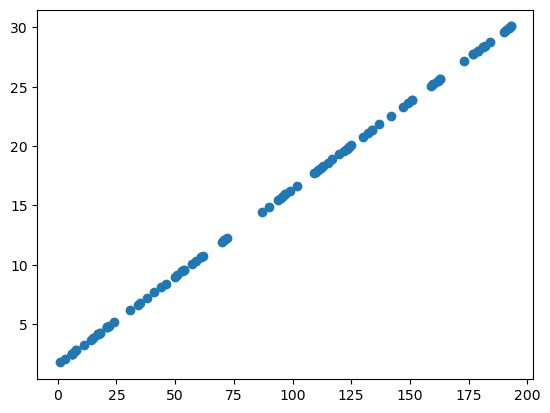

In [318]:
plt.scatter(X.reshape(-1), yp)